In [1]:
import numpy as np
import matplotlib.pyplot as plt

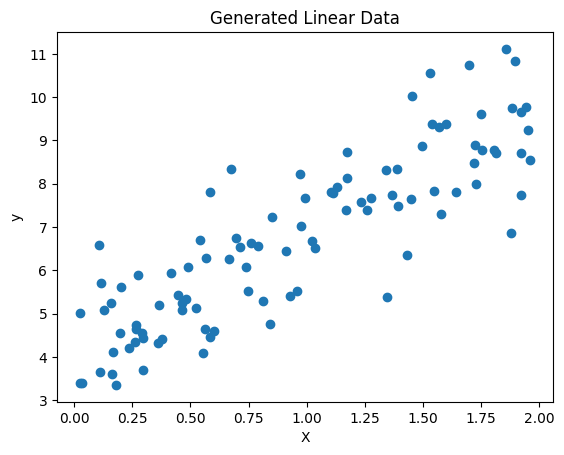

In [3]:
# Generate random linear data
# np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Linear Data")
plt.show()


In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

array([[1.        , 0.41494015],
       [1.        , 0.84937094],
       [1.        , 0.74833996],
       [1.        , 0.92715085],
       [1.        , 0.55525741],
       [1.        , 1.17356869],
       [1.        , 1.72771121],
       [1.        , 0.23506371],
       [1.        , 1.03475821],
       [1.        , 0.26413621],
       [1.        , 1.43371936],
       [1.        , 0.79211941],
       [1.        , 1.13084262],
       [1.        , 0.36655967],
       [1.        , 0.28969552],
       [1.        , 0.97611256],
       [1.        , 0.71122548],
       [1.        , 1.88086389],
       [1.        , 1.53065051],
       [1.        , 1.49732724],
       [1.        , 1.80743948],
       [1.        , 0.16684487],
       [1.        , 1.10438494],
       [1.        , 1.16895214],
       [1.        , 1.92387276],
       [1.        , 0.58429505],
       [1.        , 0.48165756],
       [1.        , 0.20058788],
       [1.        , 0.03285926],
       [1.        , 1.85905863],
       [1.

In [7]:
# θ = (XᵀX)^(-1)Xᵀy
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Best theta (weights):", theta_best)


Best theta (weights): [[4.10189775]
 [2.77998374]]


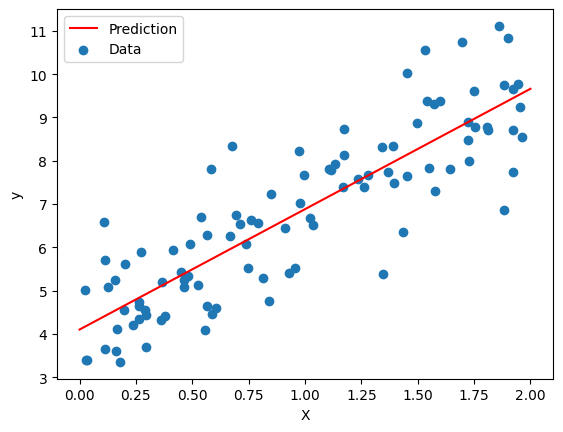

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best

plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.scatter(X, y, label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [9]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

cost = compute_cost(X_b, y, theta_best)
print("Cost (MSE):", cost)


Cost (MSE): 0.49341506895845144


Theta after Gradient Descent: [[3.91073668]
 [2.94523681]]


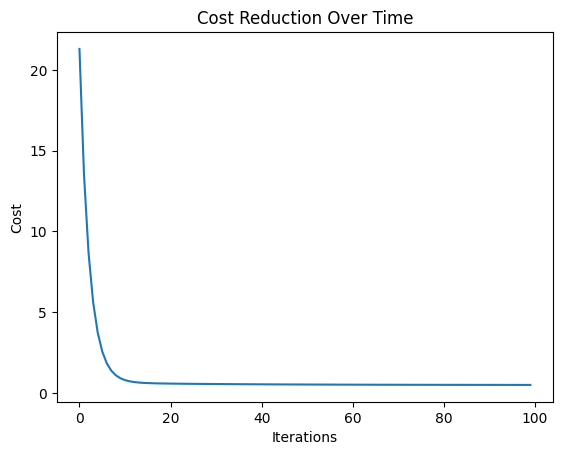

In [10]:
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=100):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * X.T @ (X @ theta - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

theta_init = np.random.randn(2, 1)
theta_gd, cost_history = gradient_descent(X_b, y, theta_init)

print("Theta after Gradient Descent:", theta_gd)

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()
